<a href="https://colab.research.google.com/github/Kyeong-Ah/test333/blob/kka/%EC%A2%85%EC%86%8C%EC%84%B8%EC%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from IPython.core.pylabtools import figsize
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [ ]:
# # Arima
# # 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/시간별 데이터 합.csv', encoding='cp949')
taxJ = pd.DataFrame()
yymm = []
yymm = pd.date_range("2011-01", "2022-01", freq="M")
taxJ['ymd'] = yymm
taxJ['tax_jongso'] = data['종소세율']
timeSeries = taxJ.loc[:, ['ymd', 'tax_jongso']]
# timeSeries.index = timeSeries.ymd
timeSeries.drop('ymd', axis=1)
timeSeries = timeSeries.set_index('ymd')
print(timeSeries.head(5))
ts = timeSeries
print(ts)
print(ts.info())


            tax_jongso
ymd                   
2011-01-31    0.001793
2011-02-28    0.001793
2011-03-31    0.001793
2011-04-30    0.001793
2011-05-31    0.001793
            tax_jongso
ymd                   
2011-01-31    0.001793
2011-02-28    0.001793
2011-03-31    0.001793
2011-04-30    0.001793
2011-05-31    0.001793
...                ...
2021-08-31    0.003125
2021-09-30    0.003125
2021-10-31    0.003125
2021-11-30    0.003125
2021-12-31    0.003125

[132 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2011-01-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tax_jongso  132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB
None


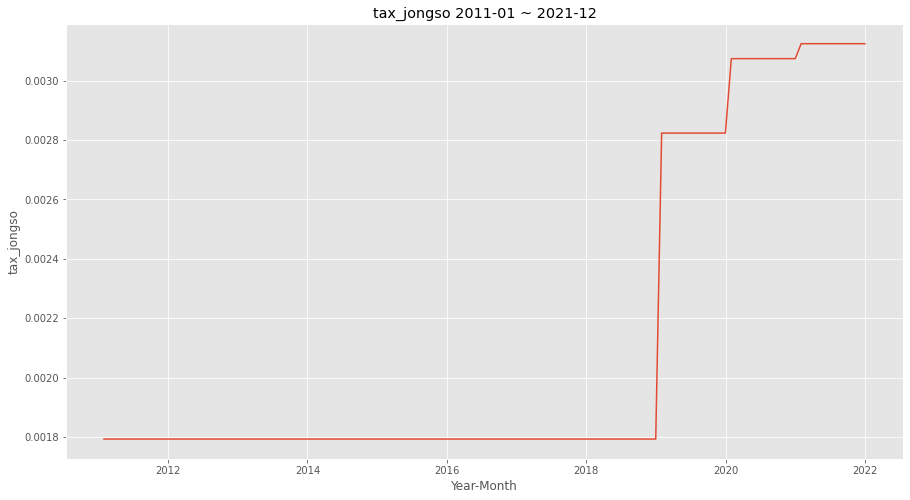

In [ ]:
# # 2011-01부터 2021-12 까지 종합부동산세율 그래프
plt.figure(figsize=(15, 8))
plt.plot(ts)
plt.title("tax_jongso 2011-01 ~ 2021-12")
plt.xlabel("Year-Month")
plt.ylabel("tax_jongso")
plt.show()


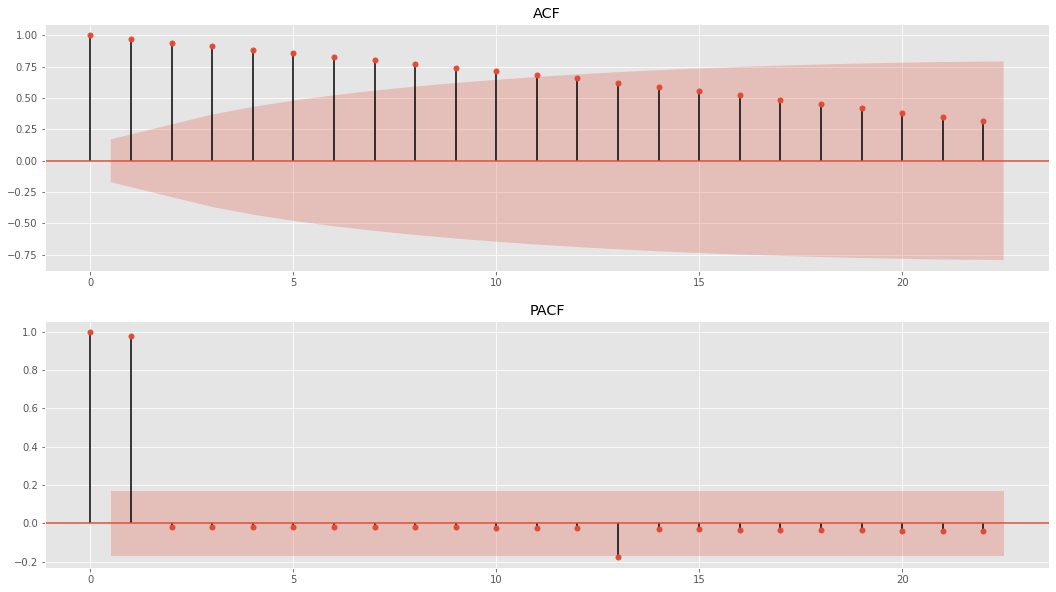

In [ ]:
# # ACF, PACF 그래프
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig = plot_acf(ts, ax = ax1)
ax1.set_title("ACF")
fig = plot_pacf(ts, ax = ax2)
ax2.set_title("PACF")
plt.show()


<Figure size 432x288 with 0 Axes>

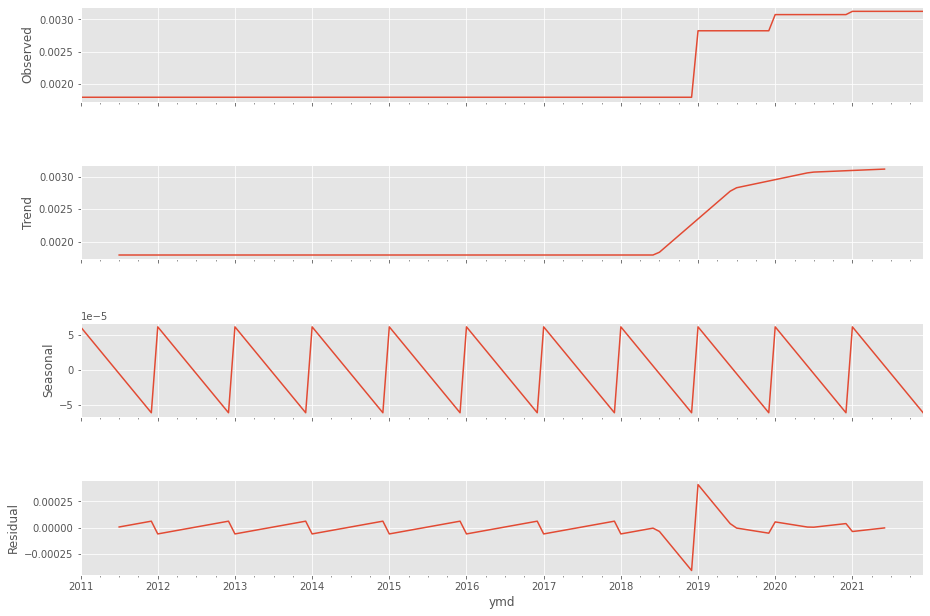

In [ ]:
# # seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['tax_jongso'], model='additive')
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)
plt.show()


In [ ]:
# # 정상성 확인 : ADF(Augmented Dickey-Fuller test)
# # 귀무가설 : 자료가 정상성을 만족하지 않는다. / 대립가설 : 자료가 정상성을 만족한다.

''' 콜랩에서 adfuller가 임포트가 안 되서... 이건 보류. '''

# from statsmodels.tsa.stattools import adfuller
# result1 = adfuller(ts)
# print('ADF Statistic : %f'% result1[0])
# print('p-value : %f'% result1[1])
# print('Critical Values : ')
# for key, value in result1[4].items():
#     print('\t%s: %.3f'%(key, value))
# ''' ADF Statistic : 3.745713
#     p-value : 1.000000
#     Critical Values : 
#         1%: -3.487
#         5%: -2.886
#         10%: -2.580            '''

# # 1차 차분
# ts_diff = ts - ts.shift()
# print(ts_diff)

# # 1차 차분 데이터로 다시 정상성 검사
# from statsmodels.tsa.stattools import adfuller
# result2 = adfuller(ts_diff[1:])
# print(result2)
# print('\n1차 차분 후')
# print('ADF Statistic : %f'% result2[0])
# print('p-value : %f'% resul2t[1])
# print('Critical Values : ')
# for key, value in result2[4].items():
#     print('\t%s: %.3f'%(key, value))

' 콜랩에서 adfuller가 임포트가 안 되서... 이건 보류. '

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


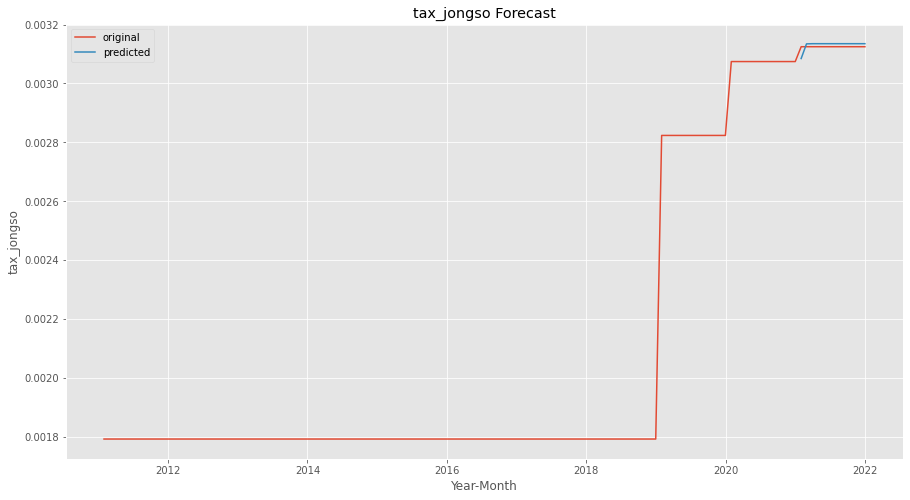

                             ARIMA Model Results                              
Dep. Variable:           D.tax_jongso   No. Observations:                  131
Model:                 ARIMA(0, 1, 1)   Log Likelihood                1031.273
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 07 Jun 2022   AIC                          -2056.546
Time:                        14:51:16   BIC                          -2047.920
Sample:                    02-28-2011   HQIC                         -2053.041
                         - 12-31-2021                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.017e-05   7.96e-06      1.277      0.204   -5.43e-06    2.58e-05
ma.L1.D.tax_jongso    -0.0123      0.088     -0.140      0.889      -0.185       0.160
                    

In [ ]:
# # ARIMA 모델 만들기
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(ts, order=(0, 1, 1))
model_fit = model.fit()
# predict
start_index = taxJ['ymd'][120] # 2021-01-31 00:00:00
end_index = taxJ['ymd'][131]   # 2021-12-31 00:00:00
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

# 시각화
plt.figure(figsize=(15, 8))
plt.plot(taxJ.ymd, taxJ['tax_jongso'], label="original")
plt.plot(forecast, label='predicted')
plt.title("tax_jongso Forecast")
plt.xlabel("Year-Month")
plt.ylabel("tax_jongso")
plt.legend()
plt.show()

print(model_fit.summary())


In [ ]:
# # 성능 확인
from sklearn import metrics

def score_check(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    #     mae = round(metrices.mean_absolute_error(y_true, y_pred),3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(
        metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    
    df = pd.DataFrame({
        'R2':r2,
        'Corr':corr,
        'RMSE':rmse,
        'MAPE':mape
    },
                    index=[0])
    return df

score_check(np.array(taxJ[taxJ.ymd>=start_index]['tax_jongso']), np.array(forecast))


,R2,Corr,RMSE,MAPE
0,0.0,NaN,0.0,0.407


In [ ]:
fore = model_fit.forecast(steps=12)
print('예측', fore)
'''    ※ stderr
      (array([0.00313509,
              0.00314526,
              0.00315543,
              0.0031656 ,
              0.00317577,
              0.00318593,
              0.0031961 ,
              0.00320627,
              0.00321644,
              0.00322661,
              0.00323677,
              0.00324694]),
       ※ upper bound
       array([9.22274958e-05, 1.29627136e-04, 1.58431303e-04, 1.82750543e-04,
       2.04193645e-04, 2.23589642e-04, 2.41432416e-04, 2.58044366e-04,
       2.73649736e-04, 2.88411965e-04, 3.02454533e-04, 3.15873437e-04]),
       ※ lower bound
       array([[0.00295433, 0.00331586],
       [0.0028912 , 0.00339933],
       [0.00284491, 0.00346595],
       [0.00280741, 0.00352378],
       [0.00277555, 0.00357598],
       [0.00274771, 0.00362416],
       [0.0027229 , 0.0036693 ],
       [0.00270051, 0.00371203],
       [0.00268009, 0.00375278],
       [0.00266133, 0.00379188],
       [0.00264397, 0.00382957],
       [0.00262784, 0.00386604]])
'''


예측 (array([0.00313509, 0.00314526, 0.00315543, 0.0031656 , 0.00317577,
       0.00318593, 0.0031961 , 0.00320627, 0.00321644, 0.00322661,
       0.00323677, 0.00324694]), array([9.22274958e-05, 1.29627136e-04, 1.58431303e-04, 1.82750543e-04,
       2.04193645e-04, 2.23589642e-04, 2.41432416e-04, 2.58044366e-04,
       2.73649736e-04, 2.88411965e-04, 3.02454533e-04, 3.15873437e-04]), array([[0.00295433, 0.00331586],
       [0.0028912 , 0.00339933],
       [0.00284491, 0.00346595],
       [0.00280741, 0.00352378],
       [0.00277555, 0.00357598],
       [0.00274771, 0.00362416],
       [0.0027229 , 0.0036693 ],
       [0.00270051, 0.00371203],
       [0.00268009, 0.00375278],
       [0.00266133, 0.00379188],
       [0.00264397, 0.00382957],
       [0.00262784, 0.00386604]]))


'   ※ stderr\n      (array([3633169.1173565,\n              3647923.56079389,\n              3662678.00423128,\n              3677432.44766867,\n              3692186.89110606,\n              3706941.33454346,\n              3721695.77798085,\n              3736450.22141824,\n              3751204.66485563,\n              3765959.10829302,\n              3780713.55173041,\n              3795467.9951678]),\n       ※ upper bound\n       array([ 9215.68280801,\n              16442.09993016,\n              21348.45405666,\n              25321.34141598,\n              28750.37689493,\n              31811.91619655,\n              34603.63929692,\n              37186.3643435,\n              39601.00419917,\n              41876.64473282,\n              44034.84091687,\n              46092.09319471]),\n       ※ lower bound\n       array([[3615106.71095985, 3651231.52375314],\n              [3615697.63710056, 3680149.48448722],\n              [3620835.80315463, 3704520.20530793],\n              